In [8]:
from utils.dataset import load_dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = load_dataset("Coffee", "TRAIN")
ts_data = data.iloc[:,1:]
ts_data = ts_data.to_numpy()
scaler = MinMaxScaler()
ts_data = scaler.fit_transform(ts_data)
org_data_shape = ts_data.shape
N  = org_data_shape[0]
T = org_data_shape[1]

ts_data = ts_data.reshape(N, T, 1)


In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Suppose labels is a 1D array of length N
labels = data.iloc[:, 0].to_numpy()  # shape (N,)

label_scaler = MinMaxScaler()
labels = label_scaler.fit_transform(labels.reshape(-1, 1))

labels = labels.reshape(N,1,1)

labels

array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[1.]]])

In [11]:
all_data = np.concatenate([labels,ts_data ],axis=1)
all_data.shape



(28, 287, 1)

In [12]:
import tsgm


tsc = tsgm.models.timeGAN.TimeGAN(T+1, n_features=1)

In [14]:
tsc.fit(all_data, epochs=10, batch_size=10)


Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RealData (InputLayer)       [(256, 287, 1)]           0         
                                                                 
 Embedder (Sequential)       (None, 287, 24)           9744      
                                                                 
 Recovery (Sequential)       (None, 287, 1)            10825     
                                                                 
Total params: 20569 (80.35 KB)
Trainable params: 20569 (80.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "AdversarialSupervised"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RandomNoise (InputLayer)    [(256, 287, 1)]           0         
                                                      

INFO:models:Start Embedding Network Training
Autoencoder - training: 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]
INFO:models:Finished Embedding Network Training
INFO:models:Start Training with Supervised Loss Only
Adversarial Supervised - training: 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]
INFO:models:Finished Training with Supervised Loss Only
INFO:models:Start Joint Training
GAN with embedding - training: 100%|██████████| 10/10 [03:08<00:00, 18.85s/it]
INFO:models:Finished Joint Training


In [6]:
samples = 100
gen_data = tsc.generate(samples)
ts_data = gen_data[:,1:,:].reshape(samples,T)
class_0 = gen_data[:,0,:]


ts_data = scaler.inverse_transform(ts_data)
labels = label_scaler.inverse_transform(class_0)
#gen_data = scaler.inverse_transform(gen_data)

Synthetic data generation: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


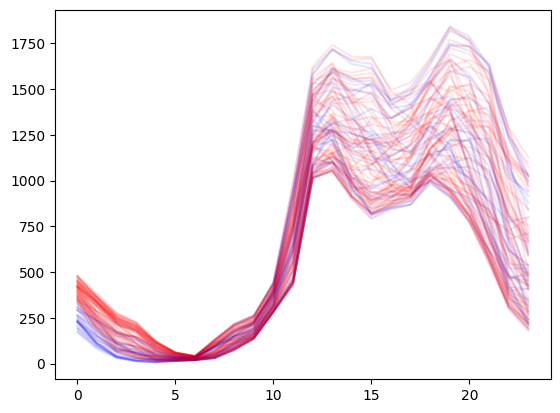

In [7]:
from matplotlib import pyplot as plt

for label, ts in zip(labels, ts_data):

    plt.plot(ts, alpha=0.1, color="red" if label > 1.5 else "blue")


In [69]:

labels

array([[1.0088491],
       [1.0107794],
       [1.0111388],
       [1.0123796],
       [1.0087636],
       [1.009168 ],
       [1.0092875],
       [1.0121627],
       [1.009429 ],
       [1.0088178],
       [1.0138097],
       [1.0112461],
       [1.0087296],
       [1.0091162],
       [1.0089108],
       [1.0085942],
       [1.008331 ],
       [1.0090017],
       [1.0118294],
       [1.010174 ],
       [1.0092328],
       [1.0103713],
       [1.0112203],
       [1.0090563],
       [1.0087684],
       [1.0098705],
       [1.0083328],
       [1.0111456],
       [1.0119709],
       [1.0110042],
       [1.0084379],
       [1.0086029],
       [1.0135137],
       [1.0127316],
       [1.0092916],
       [1.0099015],
       [1.0120095],
       [1.008511 ],
       [1.0132867],
       [1.0103946],
       [1.0089768],
       [1.0093044],
       [1.0092465],
       [1.0106125],
       [1.0134194],
       [1.0124209],
       [1.0084295],
       [1.0088242],
       [1.0107008],
       [1.0110077],
